In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('mat-1.csv')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,Pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,Pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,Pass


In [4]:
X = data.drop(['G3'], axis = 1)
y = data['G3']

In [5]:
X_encoded = pd.get_dummies(X, prefix_sep="_")  # one-hot encoding
y_encoded = LabelEncoder().fit_transform(y)    # label encoding

In [6]:
X_scaled = MinMaxScaler().fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.30, random_state=101)

In [7]:
model = RandomForestClassifier(n_estimators=700).fit(X_train, y_train)
preds = model.predict(X_test)

In [8]:
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[33  5]
 [ 4 77]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.94      0.95      0.94        81

    accuracy                           0.92       119
   macro avg       0.92      0.91      0.91       119
weighted avg       0.92      0.92      0.92       119



In [9]:
import matplotlib.pyplot as plt

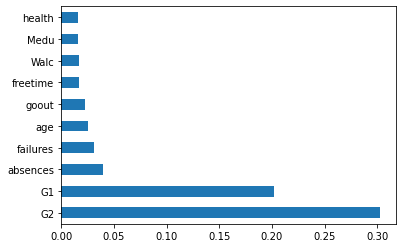

In [10]:
feature_slc = pd.Series(model.feature_importances_, index = X_encoded.columns)
feature_slc.nlargest(10).plot(kind='barh')
best_feature = feature_slc.nlargest(10).index

In [11]:
X_reduced = X_encoded[best_feature]   # after feature selection

Xr_scaled = MinMaxScaler().fit_transform(X_reduced)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_scaled, y_encoded, test_size=0.30, random_state=101)

rmodel = RandomForestClassifier(n_estimators=700).fit(Xr_train, yr_train)
rpreds = rmodel.predict(Xr_test)

In [12]:
print(confusion_matrix(yr_test, rpreds))
print(classification_report(yr_test, rpreds))

[[36  2]
 [ 6 75]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        38
           1       0.97      0.93      0.95        81

    accuracy                           0.93       119
   macro avg       0.92      0.94      0.92       119
weighted avg       0.94      0.93      0.93       119

